In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [4]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [5]:
y.index = y.name

In [6]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [7]:
y.index = pd.to_datetime(y.index)

In [8]:
# ASSUMPTION NULLS ARE 0s. NEED TO INVESTIGATE
y = y.fillna(0).sort_index()

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [9]:
from pytrends.request import TrendReq
import time

In [10]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoffs","MacBook","iPad",
            "Apple CEO","Apple Share Price","Recession","Chip Costs",
           "Taylor Swift Tickets","Is The Earth Flat", "Hospital"]  
            # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [11]:
X = df.resample("Q").mean()

In [30]:
# FIX DATA
temp = pd.concat([y,X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
x = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_scaled = scaler.fit_transform(X)

In [38]:
#Ensure same sample size
X_scaled = np.delete(X_scaled, [79, 80], axis=0)

# 4.) Run a Lasso with lambda that reduces less than half of your variables. Plot a bar chart.

In [58]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_scaled, y)
coefficients = lasso_model.coef_

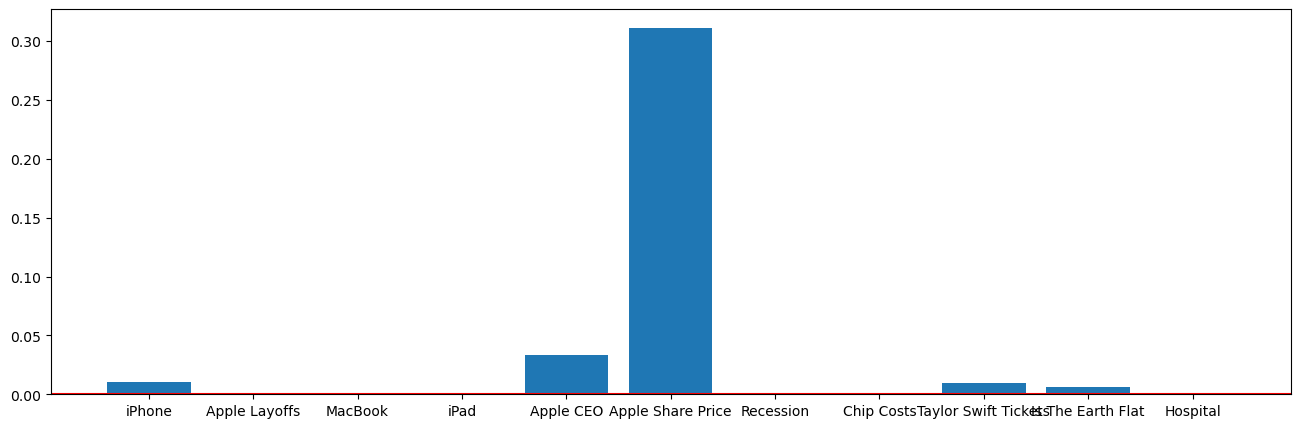

In [59]:
plt.figure (figsize = (16,5))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

### Based on the Lasso regression model, the "Apple Share Price" is identified as the primary predictor for Apple's EPS which has positive influence , overshadowing other variables which have minimal (Apple CEO)  to no influence. The presence of seemingly unrelated features, such as "Taylor Swift Tickets" or "The Earth Flat," suggests potential overfitting or a need for more careful feature selection to ensure the model's relevance and accuracy.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?